(17660, 29)
                  ID           Age       Overall     Potential       Special  \
count   17660.000000  17660.000000  17660.000000  17660.000000  17660.000000   
mean   246319.424462     23.127746     63.369592     70.981200   1537.915855   
std     31487.892861      4.639821      8.036268      6.529836    285.893809   
min        16.000000     15.000000     43.000000     42.000000    749.000000   
25%    240732.500000     20.000000     58.000000     67.000000   1387.000000   
50%    257041.000000     22.000000     63.000000     71.000000   1548.000000   
75%    263027.500000     26.000000     69.000000     75.000000   1727.000000   
max    271340.000000     54.000000     91.000000     95.000000   2312.000000   

       International Reputation     Weak Foot   Skill Moves    Kit Number  
count              17660.000000  17660.000000  17660.000000  17625.000000  
mean                   1.106285      2.900340      2.297169     25.037957  
std                    0.407021      0.

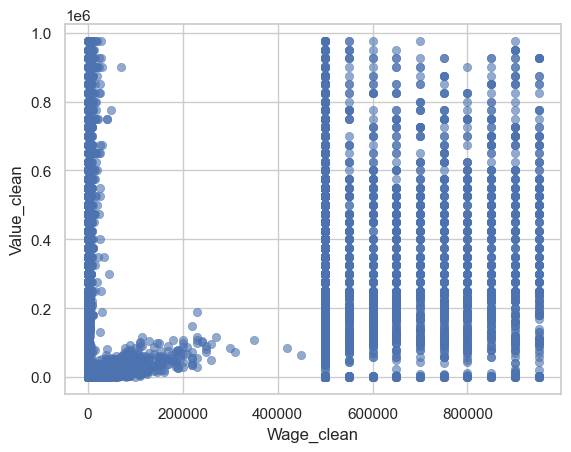

In [85]:
# 🔢 Numerical computing
import numpy as np       # efficient array operations

# 📊 Data handling
import pandas as pd      # DataFrame manipulation

# 📉 Visualization
import seaborn as sns    # high-level, aesthetically pleasing plots
sns.set(style="whitegrid")  # apply Seaborn theme for consistency

# Bokeh for interactive visualization
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool

# ───────────────
# 1. Load dataset
# ───────────────
df = pd.read_csv("fifa23.csv")  # adjust path as needed
print(df.shape)
print(df.describe())
print(df.info())

# ────────────────────────────────────────────
# 2. Clean monetary columns ("Value" and "Wage")
#    Remove currency symbols and suffixes (K/M), convert to numeric (euros)
# ────────────────────────────────────────────
def clean_money_column(series):
    clean = (
        series.str.replace("€|K|M", "", regex=True)  # strip special chars
              .astype(float)                          # convert to float
              .mul(1000)                              # treat K/M uniformly as thousands
    )
    return clean

df["Value_clean"] = clean_money_column(df["Value"])
df["Wage_clean"]  = clean_money_column(df["Wage"])

# ───────────────────────────────────────────────
# 3. Calculate difference between Wage and Value
# ───────────────────────────────────────────────
df["Wage_minus_Value"] = df["Wage_clean"] - df["Value_clean"]
print(df["Wage_minus_Value"].sort_values(ascending=False).head(10))

# ───────────────────────────────────────────────
# 4. Quick visual check using Seaborn
# ───────────────────────────────────────────────
sns.scatterplot(
    x="Wage_clean",
    y="Value_clean",
    data=df,
    alpha=0.6,       # semi-transparent points
    edgecolor=None   # cleaner look
)

# ─────────────────────────────────────────────────────
# 5. Interactive scatter plot using Bokeh
# ─────────────────────────────────────────────────────
# Wrap DataFrame in ColumnDataSource for interactivity
source = ColumnDataSource(df)

# Define hover tool to display useful insights
hover = HoverTool(tooltips=[
    ("Index", "$index"),
    ("Wage €", "@Wage_clean{0,0}"),
    ("Value €", "@Value_clean{0,0}"),
    ("Name", "@Name")
])

# Create figure
p = figure(
    title="FIFA 23: Wage vs Value",
    x_axis_label="Wage_clean (€)",
    y_axis_label="Value_clean (€)",
    width=700,
    height=700,
    tools=[hover, "pan", "wheel_zoom", "box_zoom", "reset"]
)

# Add circle glyphs
p.circle(
    x="Wage_clean",
    y="Value_clean",
    size=8,
    source=source,
    fill_alpha=0.6,
    line_color="navy",
    fill_color="orange"
)

# Display interactive plot
show(p)
